In [5]:
%matplotlib inline
import model_fitting as mf

In [6]:
# Model
model = """
     A -> B; k1*A
     B -> C; k2*B
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
"""
parameters = mf.makeParameters(constants=['k1', 'k2'])

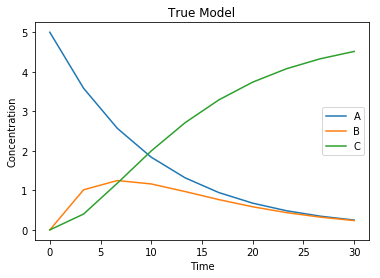

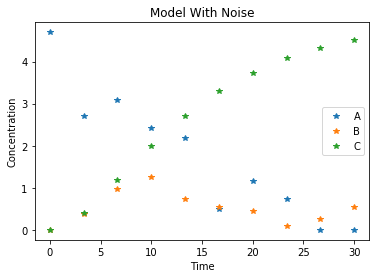

In [7]:
# Create synthetic observational data and plot it.
true_data = mf.runSimulation(model=model, num_points=10)
obs_data = mf.makeObservations(model=model, noise_std=0.5, num_points=10)
columns = ['A', 'B', 'C']
mf.plotTimeSeries(true_data, title="True Model", columns=columns)
mf.plotTimeSeries(obs_data, title="Model With Noise", is_scatter=True, columns=columns)

In [8]:
# Parameter fitting
# Illustration of parameter fitting
mf.fit(obs_data, model=model, parameters=parameters)

name,value,standard error,relative error,initial value,min,max,vary
k1,0.08879158,0.00536858,(6.05%),1,0.00000000,10.0000000,True
k2,0.24757941,0.03637855,(14.69%),1,0.00000000,10.0000000,True


In [9]:
# Cross validate to fit model
mf.crossValidate(obs_data, model=model, parameters=parameters, num_folds=3)

([Parameters([('k1',
               <Parameter 'k1', value=0.09010444287987085 +/- 0.00772, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.2666890198409033 +/- 0.0571, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=8.657431967296008 +/- 0.135, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.09118826555880977 +/- 0.0166, bounds=[0:10]>)]),
  Parameters([('k1',
               <Parameter 'k1', value=0.08439614708100618 +/- 0.00652, bounds=[0:10]>),
              ('k2',
               <Parameter 'k2', value=0.2563493979182063 +/- 0.0498, bounds=[0:10]>)])],
 [0.9784692316126536, -0.6720999664859062, 0.9594906205829241])

## Exercise 1: Effect of Observational Data
1. Re-run the foregoing with nose_std=2.0. How do the fits change? How do the $R^2$ values change? Run the codes a few times to see the variations in the quality of fit and parameter estimates.
1. Do you get better fits if you increase the number of points?

## Exercise 2: Analyze a different model

     A -> B; k1*A
     B -> C; k2*B
     A -> C; k3*C
      
     A = 5;
     B = 0;
     C = 0;
     k1 = 0.1
     k2 = 0.2
     k3 = 0.3
     
 1. Create synthetic data for this model.
 1. How do the dynamics of the second model differ from the first?
 1. Do cross validation using this model and obtain $R^2$ values and parameter estimates for 2 folds? 3 folds?

## Exercise 3: Fitting the Wrong Model
1. Create synthetic data using the second model.
1. Fit the first model to these data.
1. How do the $R^2$ values from cross validation compare with those when we use the correct model? How accurately are k1 and k2 estimated?
1. What happens to parameter estimates if k3 = 0.1?